# Top 30 Companies Plot (2 years log returns)

In [3]:
import pandas as pd
import numpy as np 
import pylab as P 
import ast
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas import Series,DataFrame,merge
plt.style.use('ggplot')
from yahoo_finance import Share
# from ast import literal_eval
%matplotlib inline
from pandas_datareader import data, wb

In [6]:
start_date = '2014-01-01' 
end_date = '2015-12-31'

In [2]:
top30 = pd.read_pickle('../data/pickles/Top30ComFinance.p')
top30.head()

,BUSINESS_SECTOR,EXCHANGE,SYMBOL,BULL_SCORED_MESSAGES,BULL_PERC,BEAR_SCORED_MESSAGES,BEAR_PERC,NEUTRAL_SCORED_MESSAGES,NEUTRAL_PERC,TOTAL_SCANNED_MESSAGES,TOTAL_SENTIMENT_MESSAGES,FINANCE
0,Technology,NASDAQ,AAPL,880890,19.08%,519740,11.26%,3215431,69.66%,4616061,1400630,"[{u'High': u'107.029999', u'Symbol': u'AAPL', ..."
1,Financial,NYSEArca,SPY,654165,20.79%,465827,14.80%,2026601,64.41%,3146593,1119992,"[{u'High': u'205.889999', u'Symbol': u'SPY', u..."
2,Technology,NASDAQ,FB,315576,19.22%,154990,9.44%,1171425,71.34%,1641991,470566,"[{u'High': u'106.169998', u'Symbol': u'FB', u'..."
3,Consumer_goods,NASDAQ,TSLA,175345,19.11%,112664,12.28%,629338,68.60%,917347,288009,"[{u'High': u'243.449997', u'Symbol': u'TSLA', ..."
4,Services,NASDAQ,NFLX,165530,19.64%,112302,13.32%,565177,67.04%,843009,277832,"[{u'High': u'117.459999', u'Symbol': u'NFLX', ..."


# Plot close prices 

In [12]:
colorIter = 0

def color_iter():
    global colorIter
    colorIter = colorIter+1
    return colorIter -1
    
def reset_color_iter():
    global colorIter
    colorIter = 0

In [10]:
def plot_close_prices(df):
    colors = plt.get_cmap('jet')(np.linspace(0, 1.0, len(df)))   
    reset_color_iter()

    def plot_close_price(row):
        f = row.FINANCE
        Date = [datetime.strptime(d['Date'], '%Y-%m-%d').date() for d in f]
        Close = [d['Close'] for d in f]
        plt.plot(Date,Close, label=row.SYMBOL, color = colors[color_iter()])

    map(plot_close_price,df.itertuples())

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gcf().autofmt_xdate()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

# Plot log returns

In [9]:
def plot_log_returns(df):
    colors = plt.get_cmap('jet')(np.linspace(0, 1.0, len(df)))
    reset_color_iter()
    
    def plot_log_return(row):
        f = DataFrame(row.FINANCE)
        f['Close'] = f['Close'].astype(float)
        f['Change'] = f.Close.pct_change()
    #     print df['pct_change']
        f['log_return'] = np.log(1 + f.Change)
    #     print df['log_return']
    #     print f
    #     Date = [datetime.strptime(d['Date'], '%Y-%m-%d').date() for d in row]
        Date = f['Date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))
        Log = f['log_return']
        plt.plot(Date, Log, label=row.SYMBOL, color = colors[color_iter()])

    map(plot_log_return,df.itertuples())

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gcf().autofmt_xdate()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

# Top 30 plots

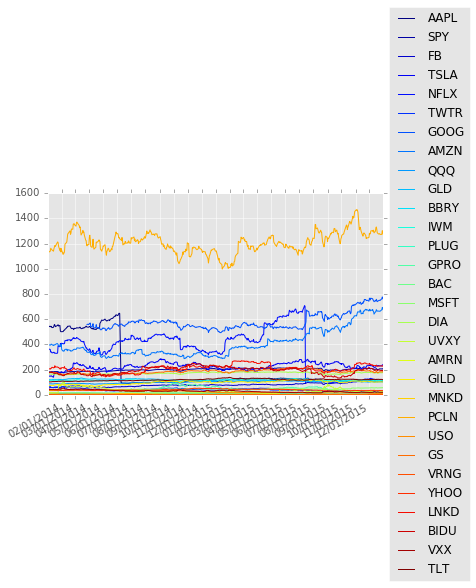

In [155]:
plot_close_prices(top30)

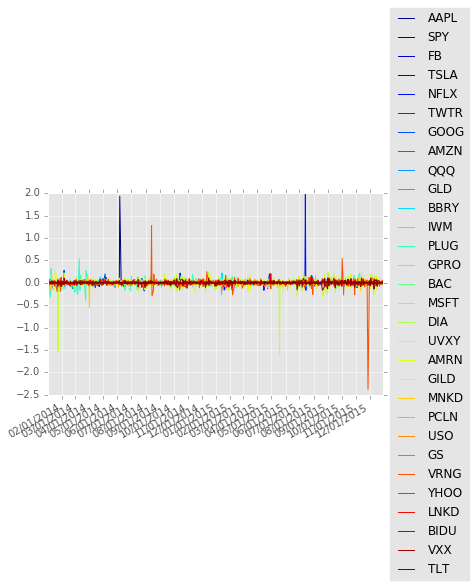

In [156]:
plot_log_returns(top30)

# AAPL example

In [115]:
AAPL = top30.loc[top30['SYMBOL'] == 'AAPL']

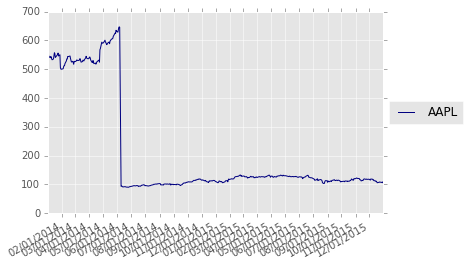

In [116]:
plot_close_prices(AAPL)

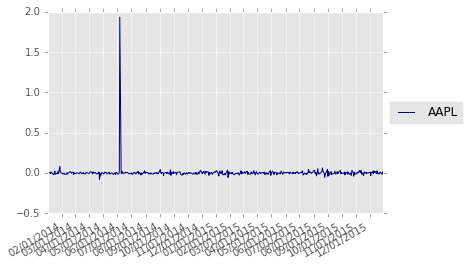

In [117]:
plot_log_returns(AAPL)

# Tech example

In [108]:
tech = top30.loc[top30['BUSINESS_SECTOR'] == 'Technology']

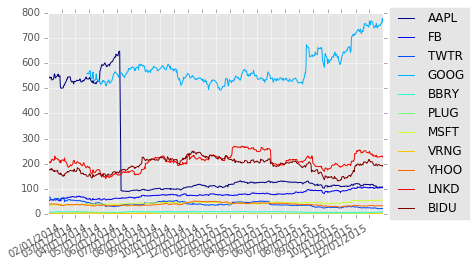

In [113]:
plot_close_prices(tech)

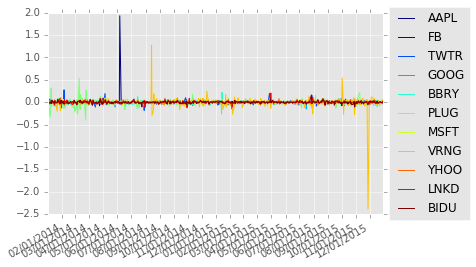

In [114]:
plot_log_returns(tech)

# Compose Exchanges

In [151]:
exch = DataFrame()
exch['EXCHANGE'] = ['NASDAQ', 'NYSE']
exch['SYMBOL'] = ['^IXIC', '^NYA']
exch['FINANCE'] = exch['SYMBOL'].apply(lambda x: Share(x).get_historical(start_date, end_date))
# exch['FINANCE'] = exchweb.DataReader("F", 'google', start_date, end_date)



In [152]:
exch.head()

,EXCHANGE,SYMBOL,FINANCE
0,NASDAQ,^IXIC,"[{u'Volume': u'1437480000', u'Symbol': u'%5eIX..."
1,NYSE,^NYA,"[{u'Volume': u'2655330000', u'Symbol': u'%5eNY..."


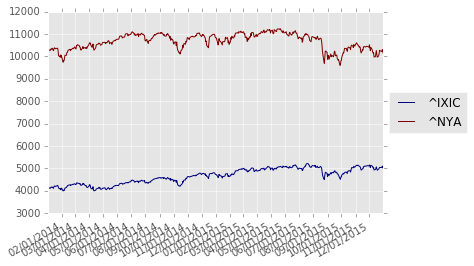

In [153]:
plot_close_prices(exch)

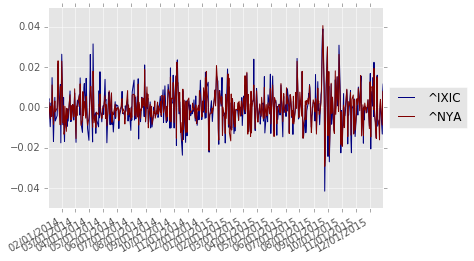

In [154]:
plot_log_returns(exch)

In [157]:
# Switch to pandas web DataReaders (Save for a rainy day)
# f = web.DataReader("F", 'google', start_date, end_date)